In [1]:
# Laura May

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import json
from pprint import pprint
from scipy.stats import linregress

In [16]:
# Read needed csv files
disaster_data = pd.read_csv("../Cleaned Data/disasters.csv")
temp_and_consump_data = pd.read_csv("../Cleaned Data/Global_Consumption_and_Temperature.csv")

# Print out disaster data frame for reference
temp_and_consump_data.head()

,Unnamed: 0,Year,Consumption,Temperature Delta
0,0,1986,649.068803,0.20980
1,1,1987,669.186533,0.34980
2,2,1988,695.270905,0.39285
3,3,1989,704.715294,0.29350
4,4,1990,717.919091,0.43640


In [17]:
disaster_data

,Year,Disaster Subgroup,Disaster Type,Country,ISO,Start Year,End Year,Total Deaths,Total Affected,Total Damages ('000 US$)
0,1986,Meteorological,Storm,Argentina,ARG,1986,1986,1.0,1000.0,NaN
1,1986,Hydrological,Flood,Argentina,ARG,1986,1986,3.0,204000.0,NaN
2,1986,Meteorological,Storm,Australia,AUS,1986,1986,NaN,NaN,5778.0
3,1986,Meteorological,Storm,Australia,AUS,1986,1986,3.0,1012.0,70000.0
4,1986,Meteorological,Storm,Australia,AUS,1986,1986,NaN,NaN,51000.0
...,...,...,...,...,...,...,...,...,...,...
10855,2016,Hydrological,Flood,United States of America (the),USA,2016,2016,5.0,NaN,2300000.0
10856,2016,Hydrological,Flood,Venezuela (Bolivarian Republic of),VEN,2016,2016,NaN,NaN,NaN
10857,2016,Biological,Epidemic,Viet Nam,VNM,2016,2016,27.0,79204.0,NaN
10858,2016,Hydrological,Flood,Viet Nam,VNM,2016,2016,21.0,206340.0,22000.0


In [23]:
# Grab relevant types of disasters and group disaster data by year
cleaned_disaster = disaster_data[(disaster_data['Disaster Subgroup'] == 'Meteorological') |
                                (disaster_data['Disaster Subgroup'] =='Climatological') |
                                (disaster_data['Disaster Subgroup'] =='Hydrological')]

grouped_total_disasters = cleaned_disaster.groupby('Year').mean()

grouped_total_disasters.head()


,Start Year,End Year,Total Deaths,Total Affected,Total Damages ('000 US$)
Year,,,,,
1986,1986.000000,1986.000000,47.565217,3.484332e+05,209597.962264
1987,1987.000000,1987.023810,118.243478,3.847383e+06,200631.875000
1988,1988.000000,1988.028736,139.212963,1.696610e+06,285288.380952
1989,1989.000000,1989.067114,97.436893,2.154207e+06,456798.666667
1990,1990.041841,1990.150628,61.821705,1.024227e+06,329872.943089


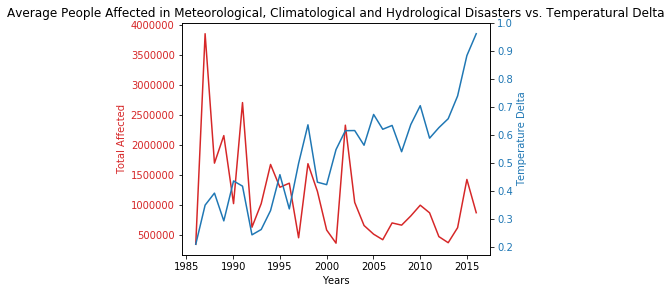

<Figure size 432x288 with 0 Axes>

In [26]:
# Set graph values and labels

years = grouped_total_disasters[['Start Year']]
number_affected = grouped_total_disasters[['Total Affected']]
temp = temp_and_consump_data[['Temperature Delta']]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Total Affected', color=color)
ax1.plot(years, number_affected, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Temperature Delta', color=color)
ax2.plot(years, temp, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Plot transit (assenger-kilometres, Millions) vs. meteorological disaster data

fig.tight_layout()
plt.title('Average People Affected in Meteorological, Climatological and Hydrological Disasters vs. Temperatural Delta')

plt.show()
plt.savefig('../Images/Line Graph Disasters vs Temp.png')


In [38]:
# Make regression funtion for scatter plot
def regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(rvalue**2)
    return line_eq

0.06276529302885762


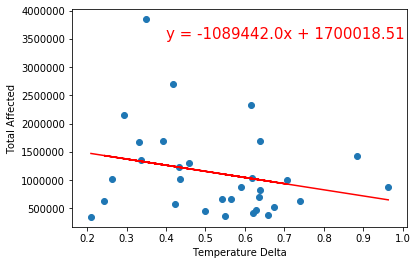

In [40]:
# Plot scatter plot for  Temp
line = regression(temp["Temperature Delta"], number_affected["Total Affected"])
plt.annotate(line,(.4,3500000),fontsize=15,color="red")
plt.xlabel('Temperature Delta')
plt.ylabel('Total Affected')
plt.savefig('../Images/scatterplot temp delt vs total affected.png')